In [3]:
import keras, os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras import regularizers
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from glob import glob
from IPython.display import display, Markdown, Latex
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
trainpaths=[]
for name in glob('/content/FruitRecognition/Fruits Classification/train/*', recursive=True):
  if not name.endswith('.zip'):
    trainpaths.append(name)
valpaths=[]
for name in glob('/content/FruitRecognition/Fruits Classification/valid/*', recursive=True):
  if not name.endswith('.zip'):
    valpaths.append(name)
testpaths=[]
for name in glob('/content/FruitRecognition/Fruits Classification/test/*', recursive=True):
  if not name.endswith('.zip'):
    testpaths.append(name)
print(trainpaths)
print(valpaths)
print(testpaths)

['/content/FruitRecognition/Fruits Classification/train/Grape', '/content/FruitRecognition/Fruits Classification/train/Strawberry', '/content/FruitRecognition/Fruits Classification/train/Mango', '/content/FruitRecognition/Fruits Classification/train/Apple', '/content/FruitRecognition/Fruits Classification/train/Banana']
['/content/FruitRecognition/Fruits Classification/valid/Grape', '/content/FruitRecognition/Fruits Classification/valid/Strawberry', '/content/FruitRecognition/Fruits Classification/valid/Mango', '/content/FruitRecognition/Fruits Classification/valid/Apple', '/content/FruitRecognition/Fruits Classification/valid/Banana']
['/content/FruitRecognition/Fruits Classification/test/Grape', '/content/FruitRecognition/Fruits Classification/test/Strawberry', '/content/FruitRecognition/Fruits Classification/test/Mango', '/content/FruitRecognition/Fruits Classification/test/Apple', '/content/FruitRecognition/Fruits Classification/test/Banana']


In [5]:
train_img_paths=[]
train_labels=[]
for i in trainpaths:
  for name in glob(i+'/*'):
    a=name.split('/')
    train_img_paths.append(name)
    train_labels.append(a[-2])

val_img_paths=[]
val_labels=[]
for i in valpaths:
  for name in glob(i+'/*'):
    a=name.split('/')
    val_img_paths.append(name)
    val_labels.append(a[-2])

test_img_paths=[]
test_labels=[]
for i in testpaths:
  for name in glob(i+'/*'):
    a=name.split('/')
    test_img_paths.append(name)
    test_labels.append(a[-2])

print(len(train_img_paths))
print(len(val_img_paths))
print(len(test_img_paths))
print(set(train_labels))

9700
200
100
{'Mango', 'Banana', 'Strawberry', 'Grape', 'Apple'}


#*Count Plot of Train data in data set:*

<Axes: xlabel='1', ylabel='count'>

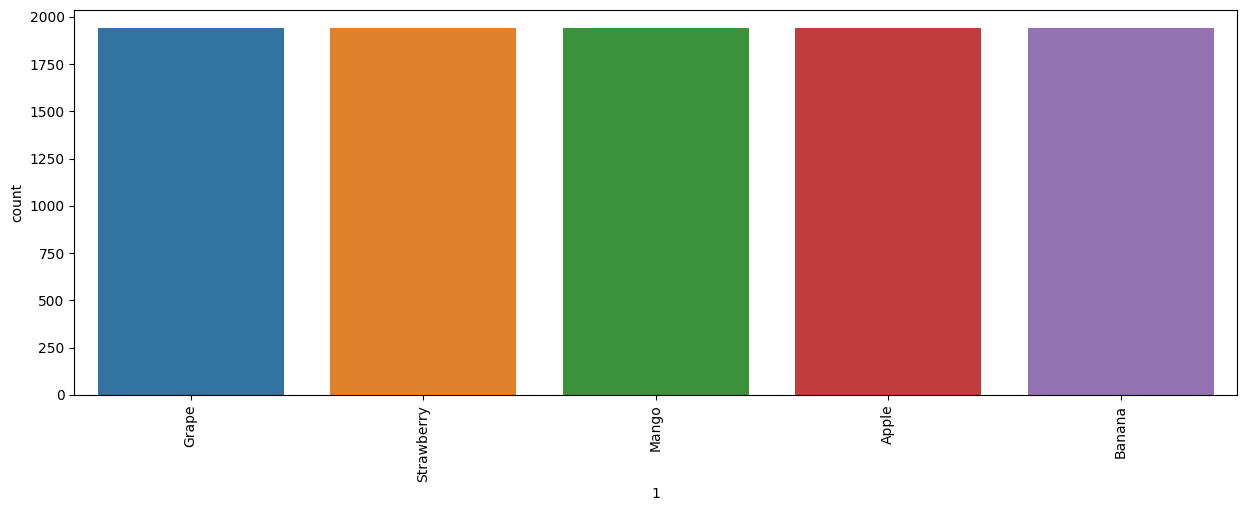

In [6]:
trainImgPath = pd.Series(train_img_paths).astype(str)
trainLabels=pd.Series(train_labels)
trainData = pd.concat([trainImgPath,trainLabels],axis=1)
display(Markdown("#*Count Plot of Train data in data set:*"))
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x=trainData[1], order=trainData[1].value_counts().index)

#*Count Plot of Validation data in data set:*

<Axes: xlabel='1', ylabel='count'>

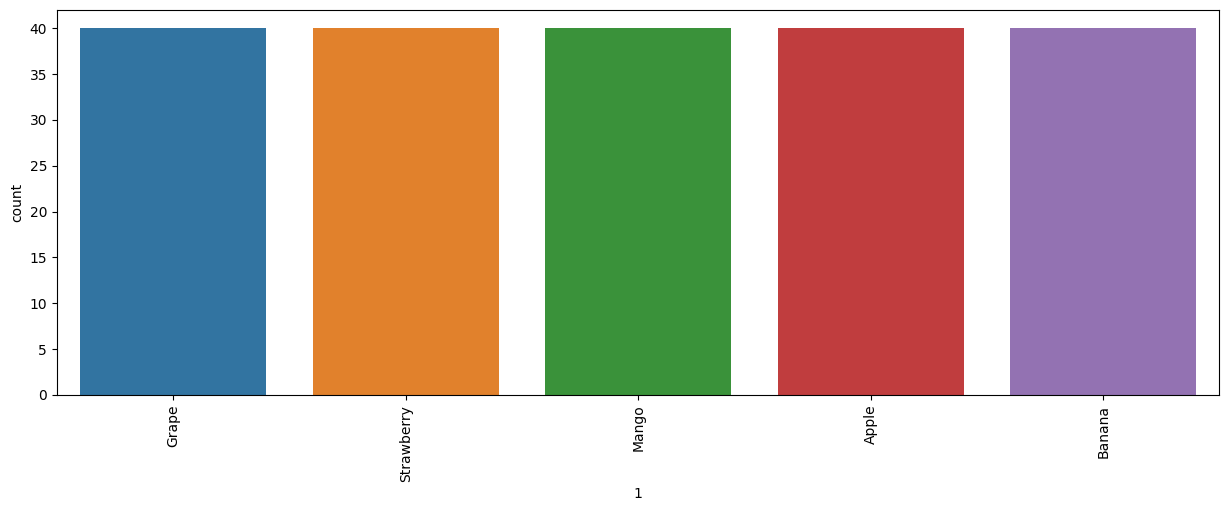

In [7]:
valImgPath = pd.Series(val_img_paths).astype(str)
valLabels=pd.Series(val_labels)
valData = pd.concat([valImgPath,valLabels],axis=1)
display(Markdown("#*Count Plot of Validation data in data set:*"))
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x=valData[1], order=valData[1].value_counts().index)

#*Count Plot of Test data in data set:*

<Axes: xlabel='1', ylabel='count'>

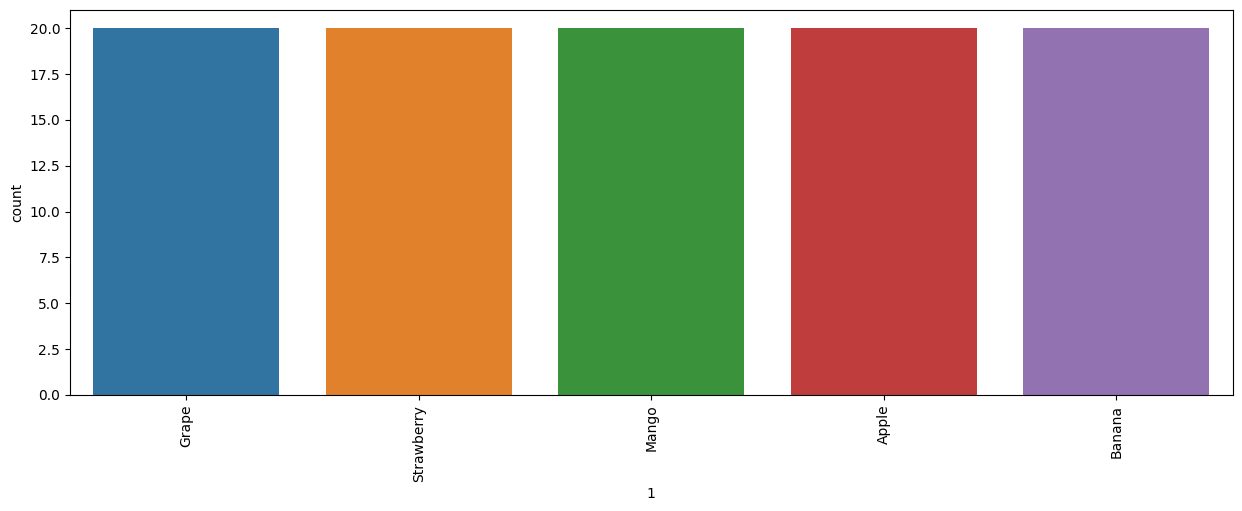

In [8]:
testImgPath = pd.Series(test_img_paths).astype(str)
testLabels=pd.Series(test_labels)
testData = pd.concat([testImgPath,testLabels],axis=1)
display(Markdown("#*Count Plot of Test data in data set:*"))
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x=testData[1], order=testData[1].value_counts().index)

In [9]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

In [24]:
train_gen = ImageDataGenerator()
val_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()
aug_gen = ImageDataGenerator(preprocessing_function=to_grayscale_then_rgb)


train_data = train_gen.flow_from_dataframe(
    dataframe = trainData,
    x_col = 0,
    y_col = 1,
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True
)

aug_data = aug_gen.flow_from_dataframe(
    dataframe = trainData,
    x_col = 0,
    y_col = 1,
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True
)

val_data = val_gen.flow_from_dataframe(
    dataframe = valData,
    x_col = 0,
    y_col = 1,
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True
)

test_data = test_gen.flow_from_dataframe(
    dataframe = testData,
    x_col = 0,
    y_col = 1,
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = False
)


Found 9700 validated image filenames belonging to 5 classes.
Found 9700 validated image filenames belonging to 5 classes.
Found 200 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


In [29]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu", activity_regularizer=regularizers.L2(0.0001)))
model.add(Dense(units=1000,activation="relu"))
model.add(Dense(units=5, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [30]:
model.compile(
    optimizer = tf.optimizers.SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
def combine_gen(*gens):
    while True:
        for g in gens:
            yield next(g)

In [32]:
history1 = model.fit(combine_gen(train_data, aug_data), steps_per_epoch=len(train_data)+len(aug_data), epochs=10, validation_data=val_data)

Epoch 1/10
608/608 [==============================] - 294s 478ms/step - loss: 1.5355 - accuracy: 0.2897 - val_loss: 1.3399 - val_accuracy: 0.3950
Epoch 2/10
608/608 [==============================] - 291s 478ms/step - loss: 1.3940 - accuracy: 0.3788 - val_loss: 1.2326 - val_accuracy: 0.4500
Epoch 3/10
608/608 [==============================] - 291s 479ms/step - loss: 1.3162 - accuracy: 0.4169 - val_loss: 1.2325 - val_accuracy: 0.5300
Epoch 4/10
608/608 [==============================] - 291s 479ms/step - loss: 1.3238 - accuracy: 0.4255 - val_loss: 1.1489 - val_accuracy: 0.5350
Epoch 5/10
608/608 [==============================] - 291s 479ms/step - loss: 1.2636 - accuracy: 0.4589 - val_loss: 1.2116 - val_accuracy: 0.4900
Epoch 6/10
608/608 [==============================] - 291s 478ms/step - loss: 1.1963 - accuracy: 0.5004 - val_loss: 1.0896 - val_accuracy: 0.5700
Epoch 7/10
608/608 [==============================] - 291s 479ms/step - loss: 1.1491 - accuracy: 0.5239 - val_loss: 1.0863 -

In [33]:
history2 = model.fit(combine_gen(train_data, aug_data), steps_per_epoch=len(train_data)+len(aug_data), epochs=10, validation_data=val_data)

Epoch 1/10
608/608 [==============================] - 293s 482ms/step - loss: 0.8056 - accuracy: 0.7077 - val_loss: 1.2425 - val_accuracy: 0.5650
Epoch 2/10
608/608 [==============================] - 292s 480ms/step - loss: 0.6220 - accuracy: 0.7905 - val_loss: 1.1967 - val_accuracy: 0.6100
Epoch 3/10
608/608 [==============================] - 293s 481ms/step - loss: 0.3769 - accuracy: 0.8965 - val_loss: 1.2845 - val_accuracy: 0.6100
Epoch 4/10
608/608 [==============================] - 292s 481ms/step - loss: 0.1463 - accuracy: 0.9814 - val_loss: 1.2008 - val_accuracy: 0.6600
Epoch 5/10
608/608 [==============================] - 296s 487ms/step - loss: 0.0649 - accuracy: 0.9981 - val_loss: 1.0908 - val_accuracy: 0.6650
Epoch 6/10
608/608 [==============================] - 293s 482ms/step - loss: 0.0463 - accuracy: 0.9992 - val_loss: 1.0859 - val_accuracy: 0.6550
Epoch 7/10
608/608 [==============================] - 293s 481ms/step - loss: 0.0373 - accuracy: 0.9995 - val_loss: 1.1023 -

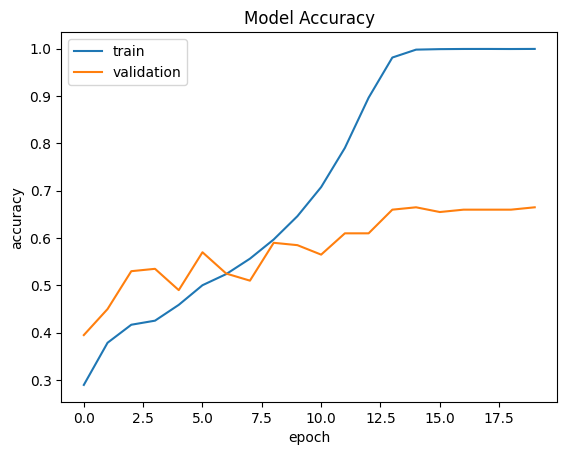

In [34]:
plt.plot(history1.history['accuracy']+history2.history['accuracy'])
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

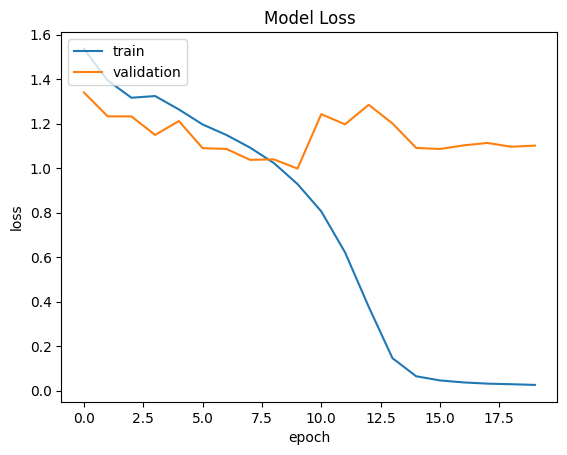

In [35]:
plt.plot(history1.history['loss']+history2.history['loss'])
plt.plot(history1.history['val_loss']+history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [36]:
pred = model.predict(test_data)
pred = np.argmax(pred,axis=1)
print(classification_report(test_data.labels,pred))

4/4 [==============================] - 1s 132ms/step
              precision    recall  f1-score   support

           0       0.65      0.55      0.59        20
           1       0.78      0.70      0.74        20
           2       1.00      0.80      0.89        20
           3       0.67      0.80      0.73        20
           4       0.72      0.90      0.80        20

    accuracy                           0.75       100
   macro avg       0.76      0.75      0.75       100
weighted avg       0.76      0.75      0.75       100



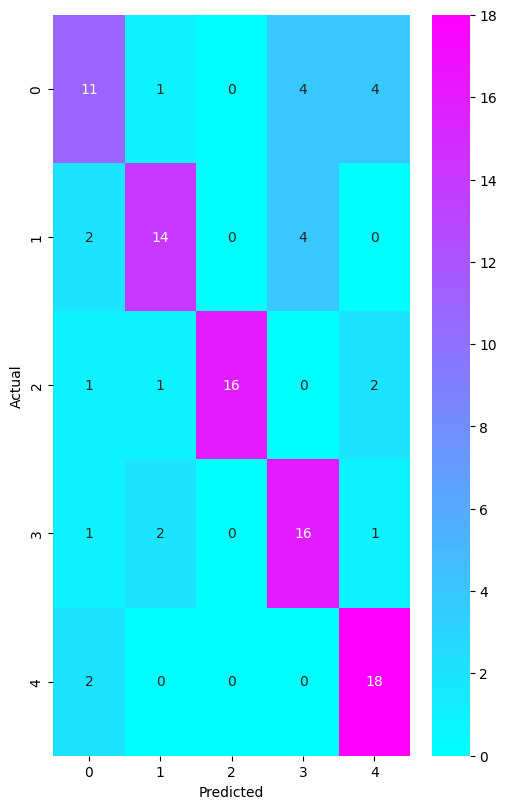

In [37]:
classes=[i for i in range(5)]
con_mat_df = pd.DataFrame(confusion_matrix(test_data.labels,pred),
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(5, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.cool,fmt='d')
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [39]:
model_json = model.to_json()
with open("/content/modelv2_1.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("/content/modelv2_1.h5")
print("Saved model to disk")

Saved model to disk


In [43]:
train_data.class_indices

{'Apple': 0, 'Banana': 1, 'Grape': 2, 'Mango': 3, 'Strawberry': 4}

In [50]:
from skimage import io
#plt.imshow()
img = cv2.resize(io.imread("https://www.thespruceeats.com/thmb/h-Ms-7u8wCxNRV90He2-NMSR_7U=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/vegan-chocolate-peanut-butter-banana-smoothie-1000994-step-01-cropped-cb4d40c4a42847bba50c266845ea239e.jpg"),(224,224))
img = np.expand_dims(img, axis=0)
model.predict(img)

1/1 [==============================] - 0s 19ms/step


array([[1.0238838e-04, 9.9875224e-01, 2.4599848e-07, 1.1382403e-03,
        6.8470781e-06]], dtype=float32)